In [1]:
!pip install pandas_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 62.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=e19daa3dbe097cbe3a81f935b8f0d2bfc2c66236954b5965f4791fe6ac0f4f72
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install kmodes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
import os


file_path = '/content/drive/My Drive/cardio_data.csv'

df = pd.read_csv(file_path, sep=';')

from kmodes.kmodes import KModes

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# # supress warnings
# import warnings
# warnings.filterwarnings('ignore')

In [5]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
print(df.isnull().values.any())

False


In [8]:
#removing Outliers
# Let's remove weights and heights, that fall below 2.5% or above 97.5% of a given range.
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)

In [9]:
#In addition, in some cases diastolic pressure is higher than systolic, which is also  incorrect. How many records are inaccurate in terms of blood pressure?
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 1082 cases


In [10]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

In [11]:
#after removing outliers
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000
mean,49895.698065,19468.719979,1.347311,164.554854,73.426805,125.770526,81.046307,1.350953,1.220229,0.085631,0.051877,0.803648,0.488228
std,28840.467755,2460.510296,0.476120,6.830174,11.614806,13.761847,8.239157,0.670076,0.567607,0.279820,0.221781,0.397241,0.499866
min,0.000000,10798.000000,1.000000,150.000000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24867.500000,17677.250000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49902.500000,19705.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74745.750000,21321.000000,2.000000,169.000000,80.000000,135.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,180.000000,106.000000,163.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#Transforming Data
# transforming the column AGE(measured in days) for Years
df['years'] = (df['age'] / 365).round().astype('int')
df.drop(['age'], axis='columns', inplace=True)
df.drop(['id'], axis='columns', inplace=True)

In [13]:
# age_bin in quinquenium 5 years spam
df['age_bin'] = pd.cut(df['years'], [0,20,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],
                              labels=['0-20', '20-30', '30-35', '35-40','40-45','45-50','50-55','55-60','60-65','65-70','70-75','75-80','80-85','85-90','90-95','95-100'])

In [14]:
#Transforming the column bmi in Body Mass Index Classes (1 to 6)
# Adding Body Mass Index
df['bmi'] = df['weight']/((df['height']/100)**2)

In [15]:
# transforming the column bmi in Body Mass Index Classes (1 to 6)
rating = []
for row in df['bmi']:
    if row < 18.5 :    rating.append(1) #UnderWeight
    elif row > 18.5 and row  < 24.9:   rating.append(2)#NormalWeight
    elif row > 24.9 and row < 29.9:  rating.append(3)#OverWeight
    elif row > 29.9 and row < 34.9:  rating.append(4)#ClassObesity_1
    elif row > 34.9 and row < 39.9:  rating.append(5)#ClassObesity_2
    elif row > 39.9 and row < 49.9:  rating.append(6)#ClassObesity_3
    elif row > 49.9:  rating.append('Error')

    else:           rating.append('Not_Rated')

In [16]:
# inserting Column
df['BMI_Class'] = rating

In [17]:
# general distribuition
df["BMI_Class"].value_counts(normalize=True)

,proportion
BMI_Class,
3,0.391773
2,0.361943
4,0.179209
5,0.055801
6,0.009162
1,0.002112


Creating the column MAP
Mean Arterial Pressure (MAP) = 2 Diastollic Blood Pressure + Sistolic Blood Pressure / 3

The overall blood pressure as measured in the brachial artery is maintained by the cardiac output and the total peripheral resistance (TPR) to flow. The mean arterial pressure (MAP) is calculated by the formula:

In [18]:
# creating a Column for MAP
df['MAP'] = ((2* df['ap_lo']) + df['ap_hi']) / 3

In [19]:
#Creating Classes for MAP
map_values = []
for row in df['MAP']:
    if row < 69.9:    map_values.append(1) #Low
    elif row > 70 and row  < 79.9:   map_values.append(2)#Normal
    elif row > 79.9 and row < 89.9:  map_values.append(3)#Normal
    elif row > 89.9 and row < 99.9:  map_values.append(4)#Normal
    elif row > 99.9 and row < 109.9:  map_values.append(5)#High
    elif row > 109.9 and row < 119.9:  map_values.append(6)#Normal
    elif row > 119.9:  map_values.append(7)

    else:           map_values.append('Not_Rated')

In [20]:
#inserting MAP_Class Column
df['MAP_Class'] = map_values

In [21]:
# Reordering Columns
df= df[["gender","height","weight","bmi","ap_hi","ap_lo","MAP","years","age_bin","BMI_Class","MAP_Class","cholesterol","gluc","smoke","active","cardio"]]
df.head()

,gender,height,weight,bmi,ap_hi,ap_lo,MAP,years,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
0,2,168,62.0,21.967120,110,80,90.000000,50,45-50,2,4,1,1,0,1,0
1,1,156,85.0,34.927679,140,90,106.666667,55,50-55,5,5,3,1,0,1,1
2,1,165,64.0,23.507805,130,70,90.000000,52,50-55,2,4,3,1,0,0,1
3,2,169,82.0,28.710479,150,100,116.666667,48,45-50,3,6,1,1,0,1,1
4,1,156,56.0,23.011177,100,60,73.333333,48,45-50,2,2,1,1,0,0,0


DATA ANALYSIS & PREPROCESSING

In [22]:
# only Categorical Data Columns DataFrame
df_cat = df[["gender","age_bin","BMI_Class","MAP_Class","cholesterol","gluc","smoke","active","cardio",]]

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_cat = df_cat.apply(le.fit_transform)
df_cat.head()

,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
0,1,3,1,2,0,0,0,1,0
1,0,4,4,3,2,0,0,1,1
2,0,4,1,2,2,0,0,0,1
3,1,3,2,4,0,0,0,1,1
4,0,3,1,0,0,0,0,0,0


In [24]:
df_male = df_cat.query("gender == 0")
df_female = df_cat.query("gender == 1")
df_male.head()

,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
1,0,4,4,3,2,0,0,1,1
2,0,4,1,2,2,0,0,0,1
4,0,3,1,0,0,0,0,0,0
5,0,5,2,2,1,1,0,0,0
6,0,6,4,2,2,0,0,1,0


In [25]:
df_female.head()

,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
0,1,3,1,2,0,0,0,1,0
3,1,3,2,4,0,0,0,1,1
7,1,6,3,3,2,2,0,1,1
11,1,4,1,2,0,0,0,1,0
12,1,2,1,2,0,0,0,0,0


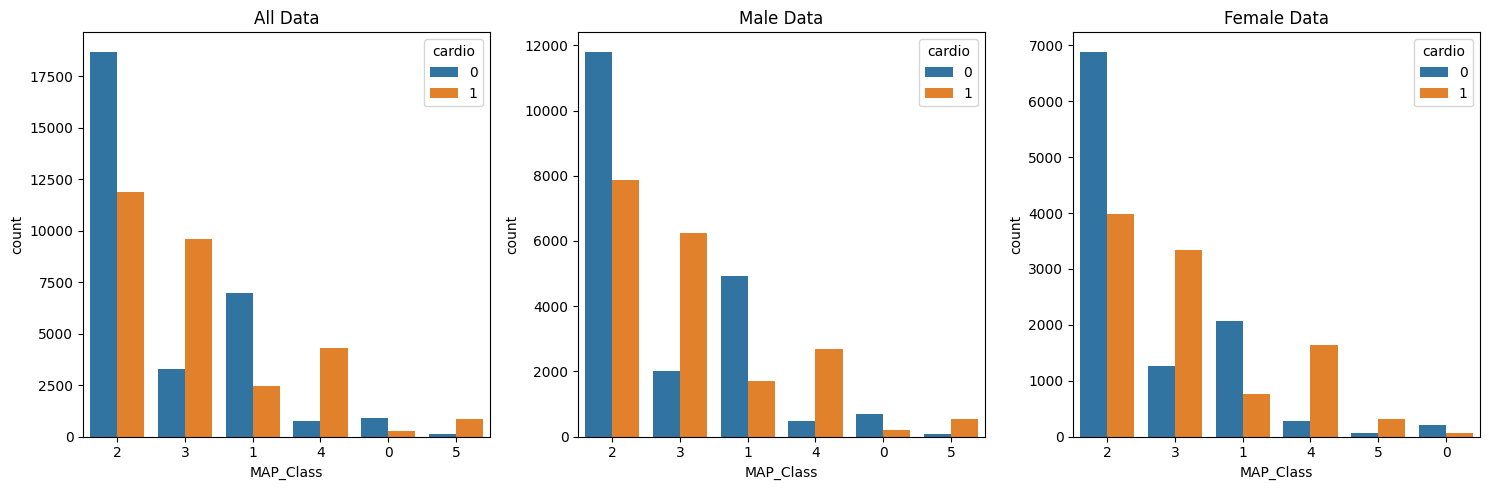

In [26]:
#MAP Classes
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df_cat['MAP_Class'],order=df_cat['MAP_Class'].value_counts().index,hue=df_cat['cardio'],ax=axs[0])
sns.countplot(x=df_male['MAP_Class'],order=df_male['MAP_Class'].value_counts().index,hue=df_male['cardio'],ax=axs[1])
sns.countplot(x=df_female['MAP_Class'],order=df_female['MAP_Class'].value_counts().index,hue=df_female['cardio'],ax=axs[2])

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

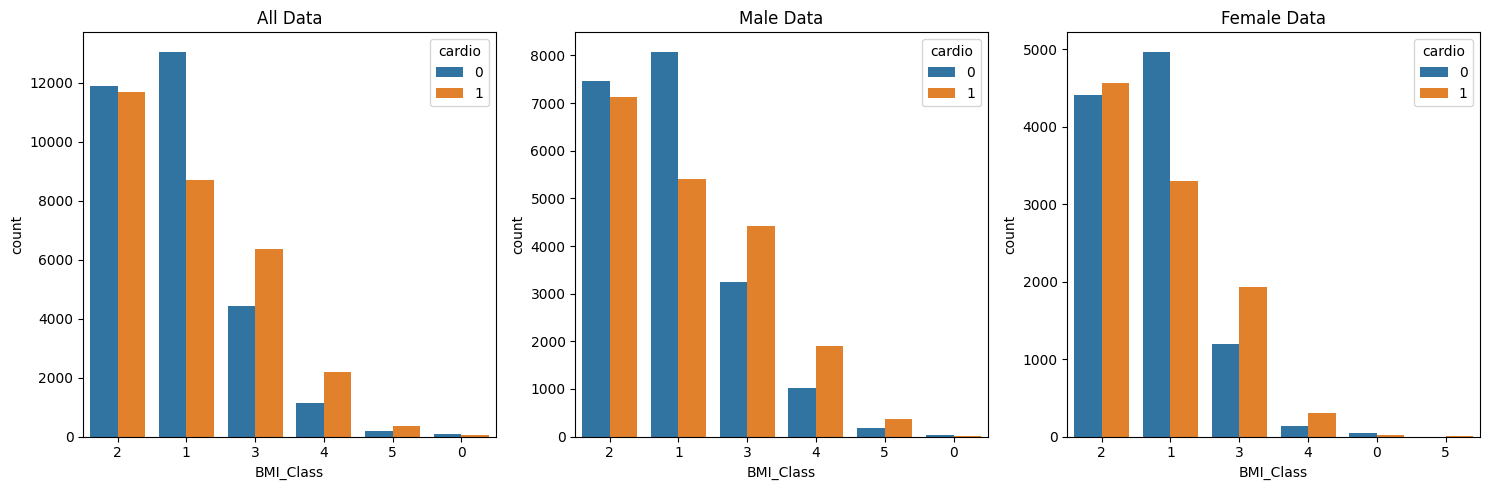

In [27]:
#BMI Classes
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df_cat['BMI_Class'],order=df_cat['BMI_Class'].value_counts().index,hue=df_cat['cardio'],ax=axs[0])
sns.countplot(x=df_male['BMI_Class'],order=df_male['BMI_Class'].value_counts().index,hue=df_male['cardio'],ax=axs[1])
sns.countplot(x=df_female['BMI_Class'],order=df_female['BMI_Class'].value_counts().index,hue=df_female['cardio'],ax=axs[2])

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

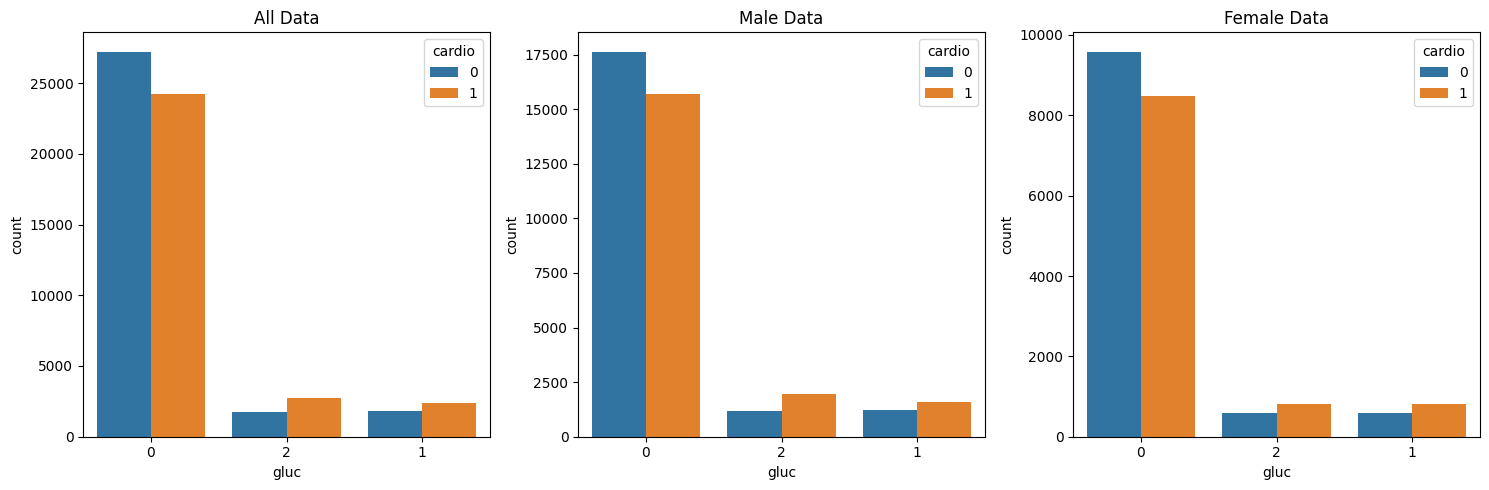

In [28]:
#Glucose
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df_cat['gluc'],order=df_cat['gluc'].value_counts().index,hue=df_cat['cardio'],ax=axs[0])
sns.countplot(x=df_male['gluc'],order=df_male['gluc'].value_counts().index,hue=df_male['cardio'],ax=axs[1])
sns.countplot(x=df_female['gluc'],order=df_female['gluc'].value_counts().index,hue=df_female['cardio'],ax=axs[2])

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()


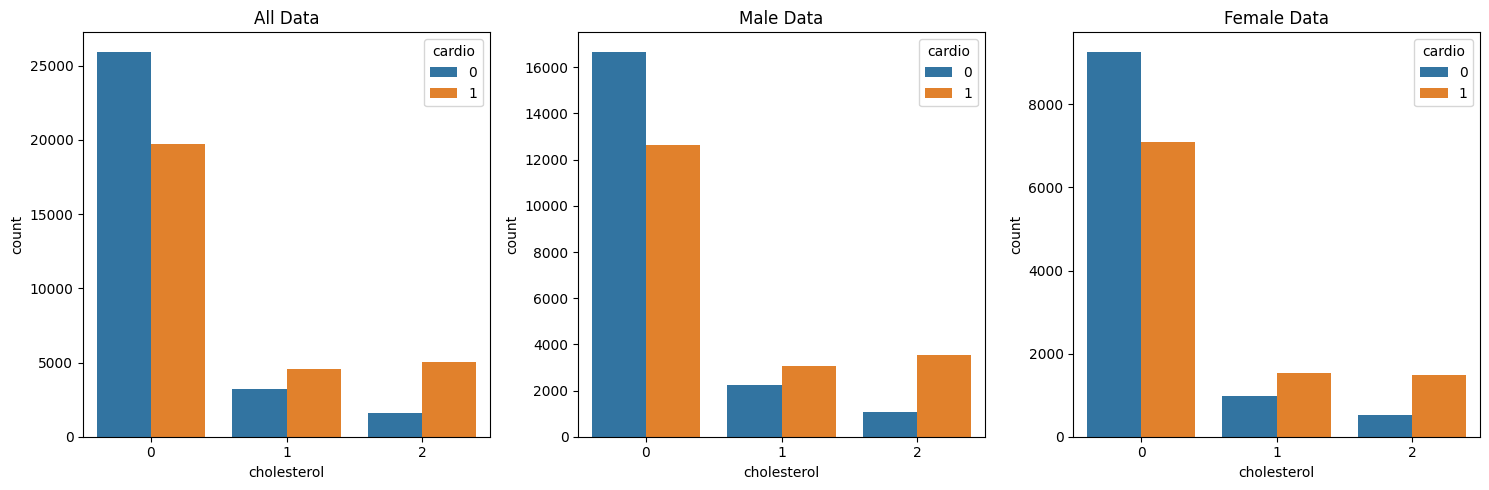

In [29]:
#Cholesterol
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df_cat['cholesterol'],order=df_cat['cholesterol'].value_counts().index,hue=df_cat['cardio'],ax=axs[0])
sns.countplot(x=df_male['cholesterol'],order=df_male['cholesterol'].value_counts().index,hue=df_male['cardio'],ax=axs[1])
sns.countplot(x=df_female['cholesterol'],order=df_female['cholesterol'].value_counts().index,hue=df_female['cardio'],ax=axs[2])

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

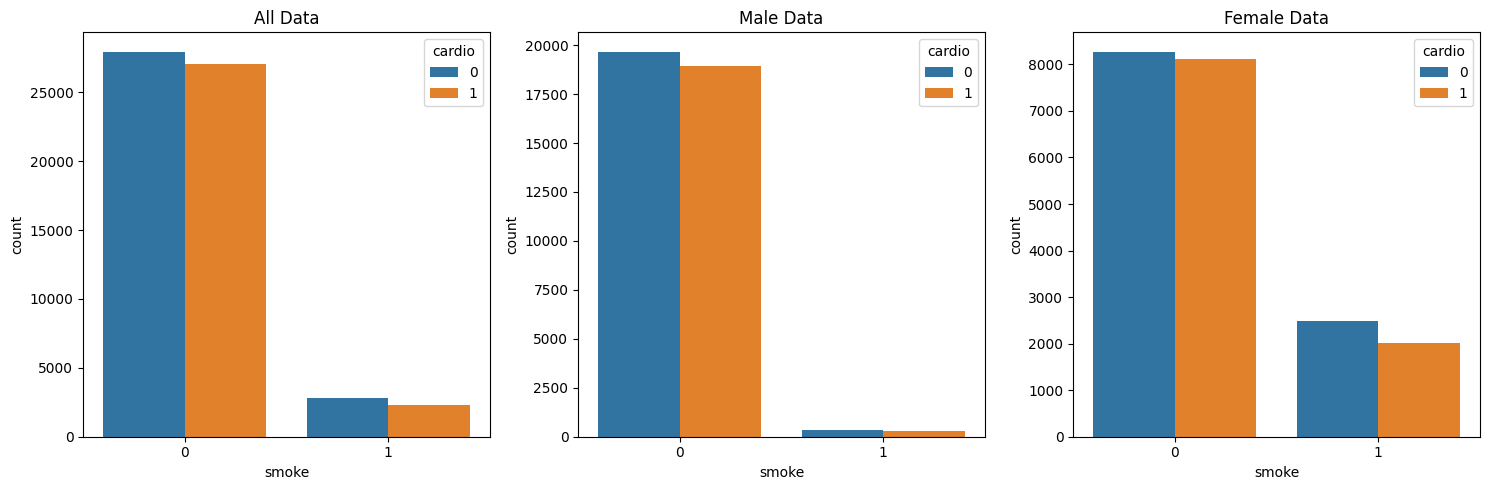

In [30]:
# Smoke
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df_cat['smoke'],order=df_cat['smoke'].value_counts().index,hue=df_cat['cardio'],ax=axs[0])
sns.countplot(x=df_male['smoke'],order=df_male['smoke'].value_counts().index,hue=df_male['cardio'],ax=axs[1])
sns.countplot(x=df_female['smoke'],order=df_female['smoke'].value_counts().index,hue=df_female['cardio'],ax=axs[2])

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

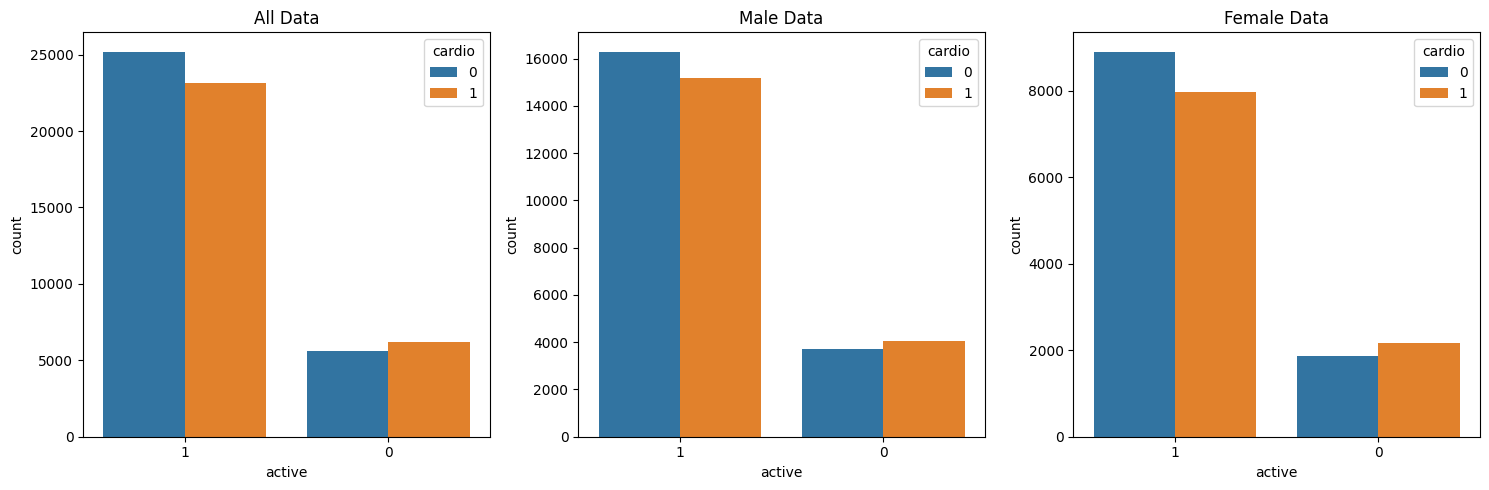

In [31]:
#Active
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df_cat['active'],order=df_cat['active'].value_counts().index,hue=df_cat['cardio'],ax=axs[0])
sns.countplot(x=df_male['active'],order=df_male['active'].value_counts().index,hue=df_male['cardio'],ax=axs[1])
sns.countplot(x=df_female['active'],order=df_female['active'].value_counts().index,hue=df_female['cardio'],ax=axs[2])

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

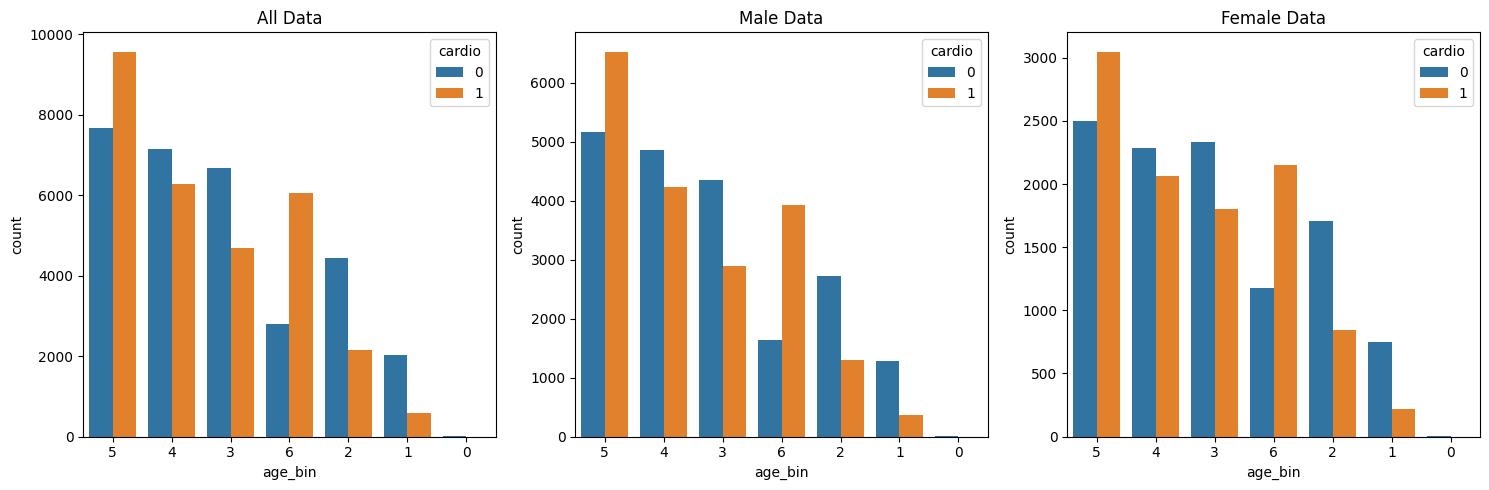

In [32]:
#Age
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df_cat['age_bin'],order=df_cat['age_bin'].value_counts().index,hue=df_cat['cardio'],ax=axs[0])
sns.countplot(x=df_male['age_bin'],order=df_male['age_bin'].value_counts().index,hue=df_male['cardio'],ax=axs[1])
sns.countplot(x=df_female['age_bin'],order=df_female['age_bin'].value_counts().index,hue=df_female['cardio'],ax=axs[2])

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

In [33]:
#KModes Analisys
# new df to work
df_male = df_cat.query("gender == 0")
df_female = df_cat.query("gender == 1")

In [34]:
df_male.head()


,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
1,0,4,4,3,2,0,0,1,1
2,0,4,1,2,2,0,0,0,1
4,0,3,1,0,0,0,0,0,0
5,0,5,2,2,1,1,0,0,0
6,0,6,4,2,2,0,0,1,0


In [35]:
df_female.head()

,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
0,1,3,1,2,0,0,0,1,0
3,1,3,2,4,0,0,0,1,1
7,1,6,3,3,2,2,0,1,1
11,1,4,1,2,0,0,0,1,0
12,1,2,1,2,0,0,0,0,0


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 199450.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 199450.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 199450.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 199450.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 199450.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10651, cost: 166605.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 7930, cost: 168746.0
Init: initializing centroids
Init: initializing clusters
Star

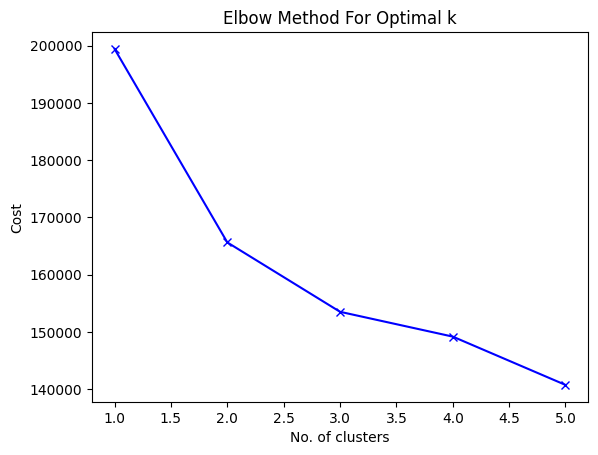

In [36]:
#Elbow Curve Method for ALL DATA
# Elbow curve to find optimal K in Huang init
cost = []
K = range(1,6)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 5, verbose=1)
    kmode.fit_predict(df_cat)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 115332.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 115332.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 115332.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 115332.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 115332.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 98182.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 9780, cost: 94092.0
Init: initializing centroids
Init: initializing clusters
Starting i

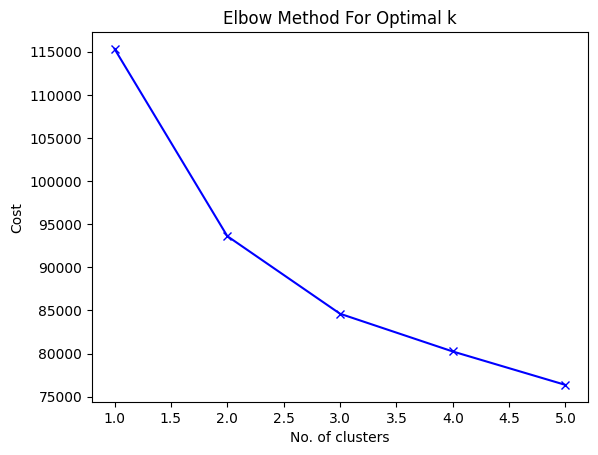

In [37]:
#Male data
# Elbow curve to find optimal K in Huang
cost = []
K = range(1,6)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 5, verbose=1)
    kmode.fit_predict(df_male)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 63230.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 63230.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 63230.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 63230.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 63230.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9841, cost: 51625.0
Run 1, iteration: 2/100, moves: 1216, cost: 51625.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 8949, cost: 51037.0
Init: initializin

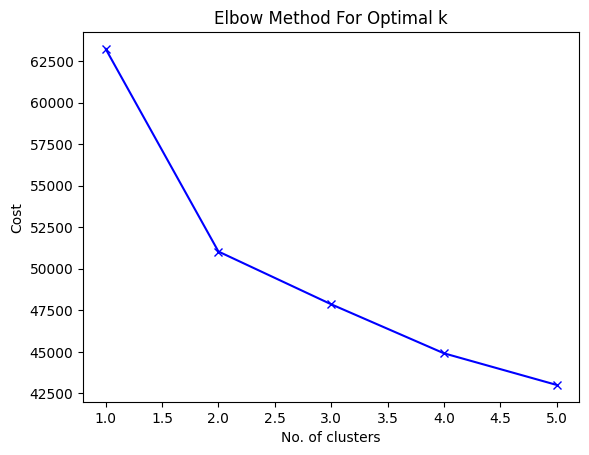

In [38]:
#Female data
# Elbow curve to find optimal K
cost = []
K = range(1,6)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 5, verbose=1)
    kmode.fit_predict(df_female)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [39]:
#Building a KModes for Data
# female data
# Building the model with using K-Mode with "Huang" initialization
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 5, verbose=0)
clusters_huang_1 = km_huang.fit_predict(df_female)
clusters_huang_1

array([1, 0, 0, ..., 0, 1, 1], dtype=uint16)

In [40]:
# male data
# Building the model with using K-Mode with "Huang" initialization
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 5, verbose=0)
clusters_huang_2 = km_huang.fit_predict(df_male)
clusters_huang_2

array([0, 0, 0, ..., 1, 1, 1], dtype=uint16)

In [41]:
#Inserting clusters in DataFrame
df_female.insert(0,"Cluster", clusters_huang_1, True)

# female DataFrame with Clusters
df_female.head()

,Cluster,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
0,1,1,3,1,2,0,0,0,1,0
3,0,1,3,2,4,0,0,0,1,1
7,0,1,6,3,3,2,2,0,1,1
11,1,1,4,1,2,0,0,0,1,0
12,1,1,2,1,2,0,0,0,0,0


In [42]:
df_male.insert(0, "Cluster", clusters_huang_2, True)

# female DataFrame with Clusters
df_male.head()

,Cluster,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
1,0,0,4,4,3,2,0,0,1,1
2,0,0,4,1,2,2,0,0,0,1
4,0,0,3,1,0,0,0,0,0,0
5,1,0,5,2,2,1,1,0,0,0
6,0,0,6,4,2,2,0,0,1,0


In [43]:
# replacing cluster column values to merge dataframes after
df_male["Cluster"].replace({0:2, 1:3}, inplace=True)
df_male.head()

<ipython-input-43-3a95e5dccc7e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_male["Cluster"].replace({0:2, 1:3}, inplace=True)
<ipython-input-43-3a95e5dccc7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male["Cluster"].replace({0:2, 1:3}, inplace=True)


,Cluster,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
1,2,0,4,4,3,2,0,0,1,1
2,2,0,4,1,2,2,0,0,0,1
4,2,0,3,1,0,0,0,0,0,0
5,3,0,5,2,2,1,1,0,0,0
6,2,0,6,4,2,2,0,0,1,0


In [44]:
# merging female and male data
df_clusters = pd.concat([df_female, df_male], ignore_index=True, sort=False)
df_clusters.head(10)

,Cluster,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
0,1,1,3,1,2,0,0,0,1,0
1,0,1,3,2,4,0,0,0,1,1
2,0,1,6,3,3,2,2,0,1,1
3,1,1,4,1,2,0,0,0,1,0
4,1,1,2,1,2,0,0,0,0,0
5,1,1,5,1,1,0,0,1,1,0
6,1,1,4,3,2,0,0,0,1,0
7,1,1,1,1,2,0,0,0,1,0
8,1,1,5,2,2,0,2,0,0,0
9,0,1,5,2,3,2,0,0,0,1


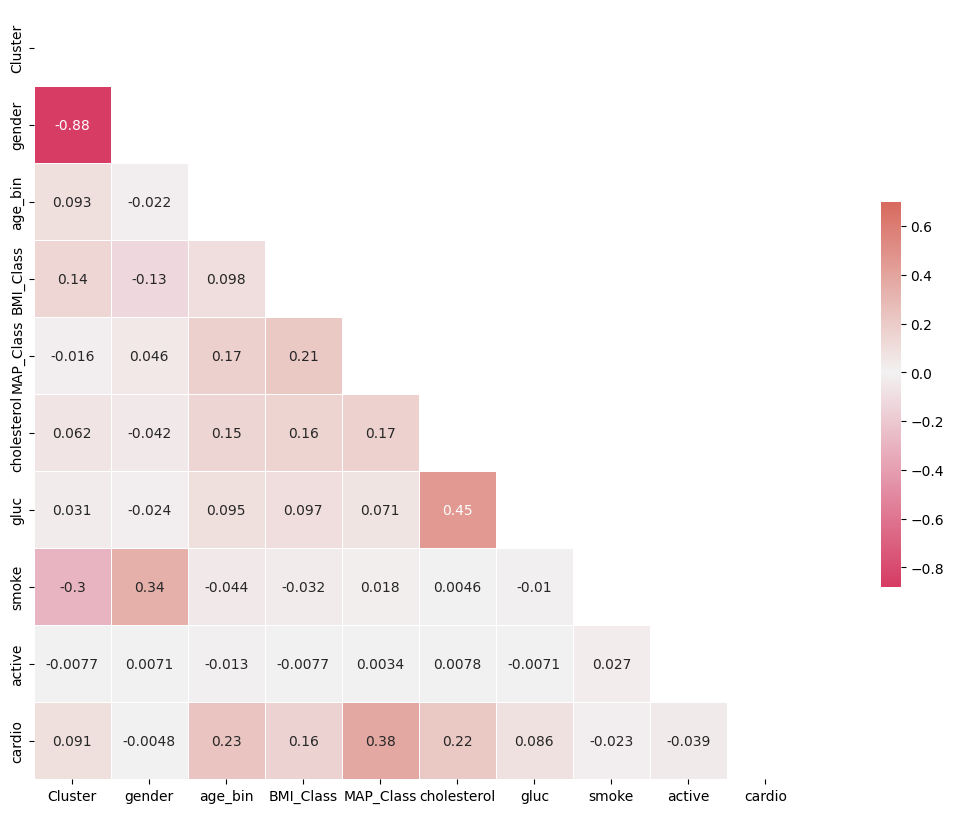

In [45]:
corr = df_clusters.corr()
cmap = sns.diverging_palette(2, 15, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.7, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

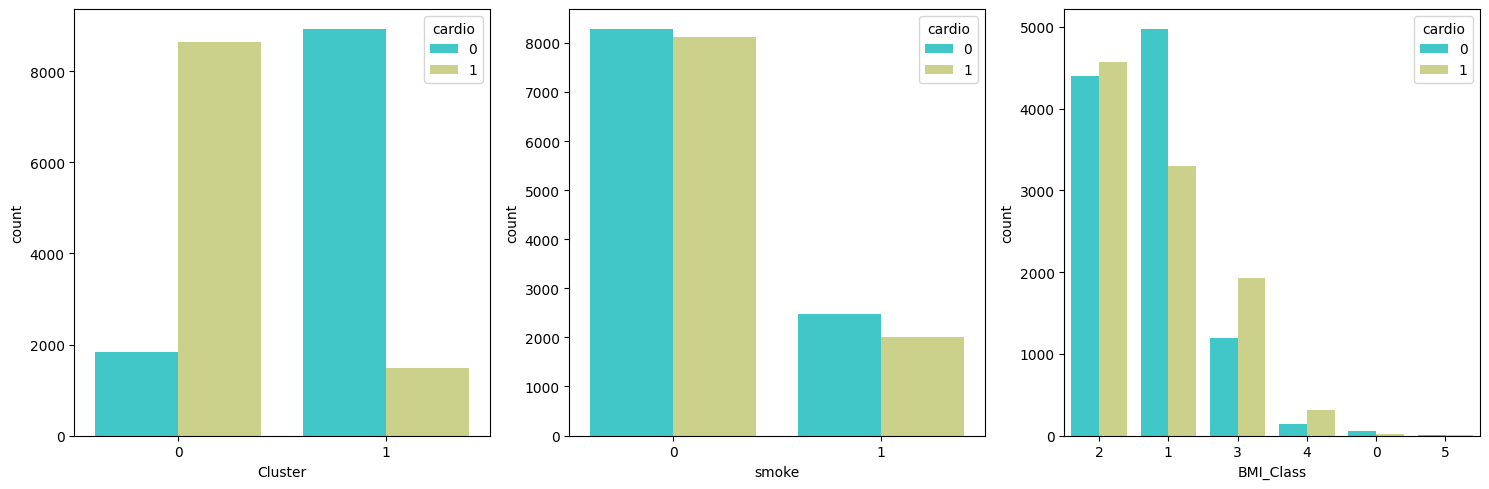

In [46]:
#Analyzing Clusters
# female
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df_female['Cluster'],order=df_female['Cluster'].value_counts().index,hue=df_female['cardio'],ax=axs[0],palette='rainbow')
sns.countplot(x=df_female['smoke'],order=df_female['smoke'].value_counts().index,hue=df_female['cardio'],ax=axs[1],palette='rainbow')
sns.countplot(x=df_female['BMI_Class'],order=df_female['BMI_Class'].value_counts().index,hue=df_female['cardio'],ax=axs[2],palette='rainbow')

plt.tight_layout()
plt.show()

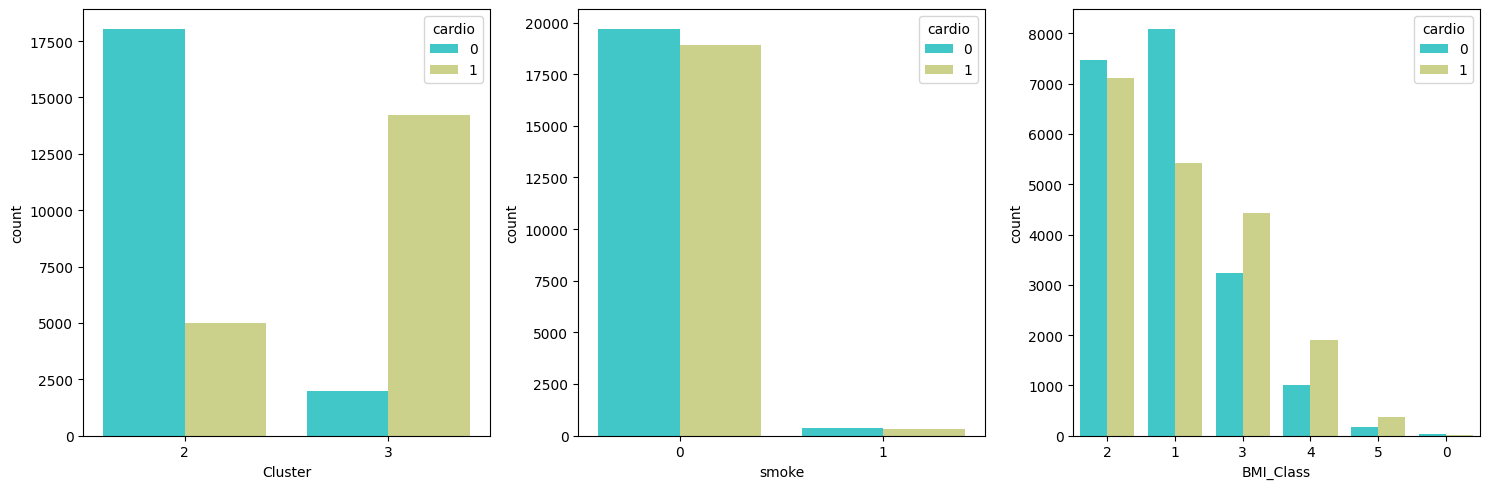

In [47]:
# male
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df_male['Cluster'],order=df_male['Cluster'].value_counts().index,hue=df_male['cardio'],ax=axs[0],palette='rainbow')
sns.countplot(x=df_male['smoke'],order=df_male['smoke'].value_counts().index,hue=df_male['cardio'],ax=axs[1],palette='rainbow')
sns.countplot(x=df_male['BMI_Class'],order=df_male['BMI_Class'].value_counts().index,hue=df_male['cardio'],ax=axs[2],palette='rainbow')

plt.tight_layout()
plt.show()

In [48]:
#Female data
# separating clusters
df_female_c0 = df_female[df_female["Cluster"] == 0]
df_female_c1 = df_female[df_female["Cluster"] == 1]


df_female_c0.head()

,Cluster,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
3,0,1,3,2,4,0,0,0,1,1
7,0,1,6,3,3,2,2,0,1,1
34,0,1,5,2,3,2,0,0,0,1
38,0,1,6,2,2,0,0,1,1,1
42,0,1,5,1,3,0,0,0,1,1


<ipython-input-49-5e6508b68f3b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_female_c0['cardio'],order=df_female_c0['cardio'].value_counts().index,ax=axs[1,3],palette='rainbow')


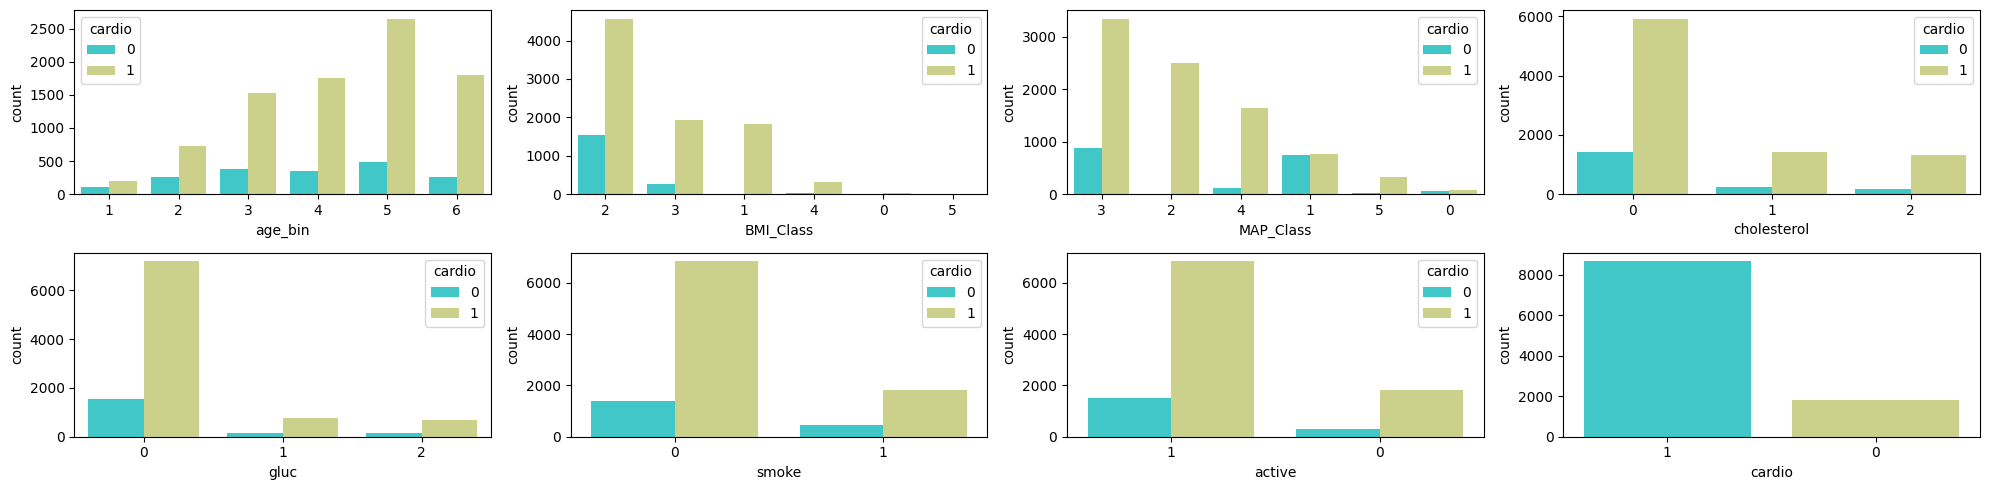

In [49]:
# for df_female_c0
f, axs = plt.subplots(2,4,figsize = (20,5))
sns.countplot(x=df_female_c0['age_bin'],hue=df_female_c0['cardio'],ax=axs[0,0],palette='rainbow')
sns.countplot(x=df_female_c0['BMI_Class'],order=df_female_c0['BMI_Class'].value_counts().index,hue=df_female_c0['cardio'],ax=axs[0,1],palette='rainbow')
sns.countplot(x=df_female_c0['MAP_Class'],order=df_female_c0['MAP_Class'].value_counts().index,hue=df_female_c0['cardio'],ax=axs[0,2],palette='rainbow')
sns.countplot(x=df_female_c0['cholesterol'],order=df_female_c0['cholesterol'].value_counts().index,hue=df_female_c0['cardio'],ax=axs[0,3],palette='rainbow')
sns.countplot(x=df_female_c0['gluc'],order=df_female_c0['gluc'].value_counts().index,hue=df_female_c0['cardio'],ax=axs[1,0],palette='rainbow')
sns.countplot(x=df_female_c0['smoke'],order=df_female_c0['smoke'].value_counts().index,hue=df_female_c0['cardio'],ax=axs[1,1],palette='rainbow')
sns.countplot(x=df_female_c0['active'],order=df_female_c0['active'].value_counts().index,hue=df_female_c0['cardio'],ax=axs[1,2],palette='rainbow')
sns.countplot(x=df_female_c0['cardio'],order=df_female_c0['cardio'].value_counts().index,ax=axs[1,3],palette='rainbow')

plt.tight_layout()
plt.show()

<ipython-input-50-f83d0cd1f299>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_female_c1['cardio'],order=df_female_c1['cardio'].value_counts().index,ax=axs[1,3],palette='rainbow')


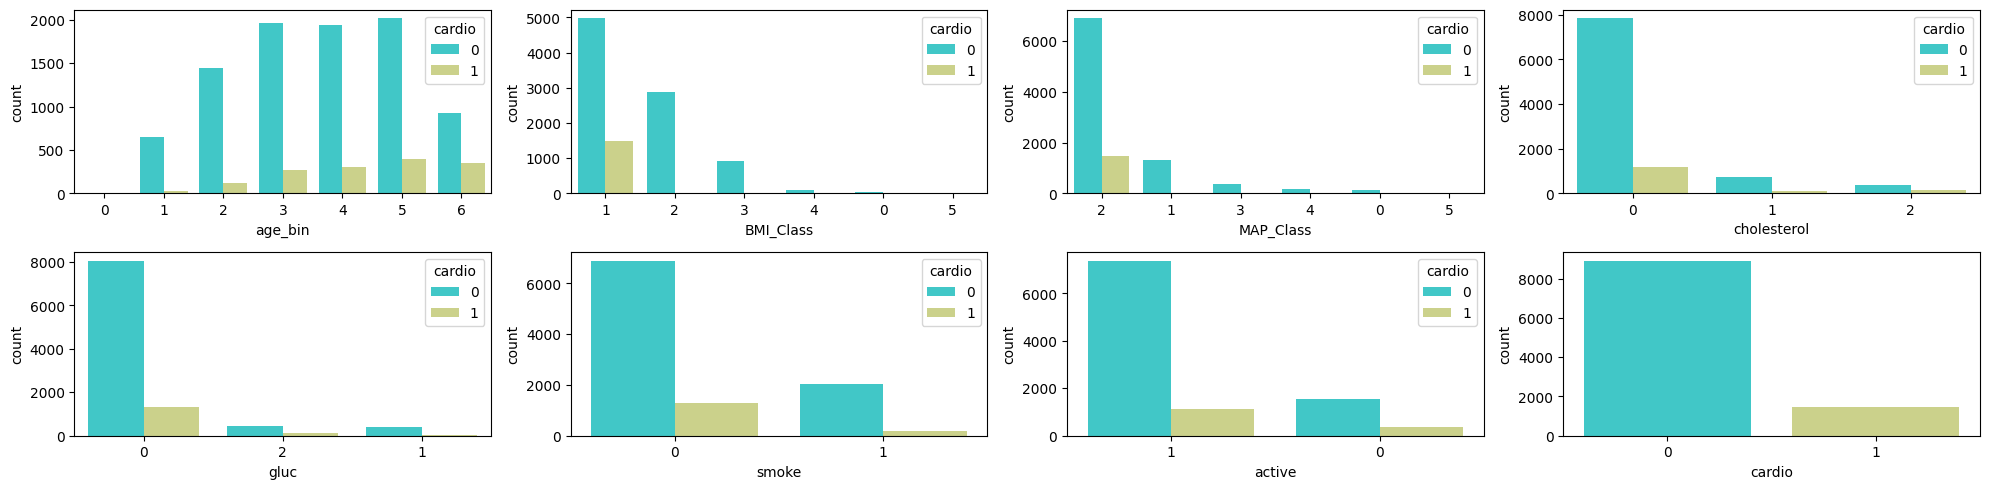

In [50]:
# for df_female_c1
f, axs = plt.subplots(2,4,figsize = (20,5))
sns.countplot(x=df_female_c1['age_bin'],hue=df_female_c1['cardio'],ax=axs[0,0],palette='rainbow')
sns.countplot(x=df_female_c1['BMI_Class'],order=df_female_c1['BMI_Class'].value_counts().index,hue=df_female_c1['cardio'],ax=axs[0,1],palette='rainbow')
sns.countplot(x=df_female_c1['MAP_Class'],order=df_female_c1['MAP_Class'].value_counts().index,hue=df_female_c1['cardio'],ax=axs[0,2],palette='rainbow')
sns.countplot(x=df_female_c1['cholesterol'],order=df_female_c1['cholesterol'].value_counts().index,hue=df_female_c1['cardio'],ax=axs[0,3],palette='rainbow')
sns.countplot(x=df_female_c1['gluc'],order=df_female_c1['gluc'].value_counts().index,hue=df_female_c1['cardio'],ax=axs[1,0],palette='rainbow')
sns.countplot(x=df_female_c1['smoke'],order=df_female_c1['smoke'].value_counts().index,hue=df_female_c1['cardio'],ax=axs[1,1],palette='rainbow')
sns.countplot(x=df_female_c1['active'],order=df_female_c1['active'].value_counts().index,hue=df_female_c1['cardio'],ax=axs[1,2],palette='rainbow')
sns.countplot(x=df_female_c1['cardio'],order=df_female_c1['cardio'].value_counts().index,ax=axs[1,3],palette='rainbow')

plt.tight_layout()
plt.show()

In [51]:
#For male data
# separating clusters
df_male_c2 = df_male[df_male["Cluster"] == 2]
df_male_c3 = df_male[df_male["Cluster"] == 3]


df_male_c2.describe()

,Cluster,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
count,23019.0,23019.0,23019.000000,23019.000000,23019.000000,23019.000000,23019.000000,23019.000000,23019.000000,23019.000000
mean,2.0,0.0,3.683262,1.826317,1.974890,0.267344,0.192537,0.017160,0.807681,0.216951
std,0.0,0.0,1.349925,1.005624,0.859277,0.586758,0.534120,0.129869,0.394131,0.412178
min,2.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.0,0.0,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2.0,0.0,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.0,0.0,5.000000,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2.0,0.0,6.000000,5.000000,5.000000,2.000000,2.000000,1.000000,1.000000,1.000000


<ipython-input-52-d38588a06b5c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_male_c2['cardio'],order=df_male_c2['cardio'].value_counts().index,ax=axs[1,3],palette='rainbow')


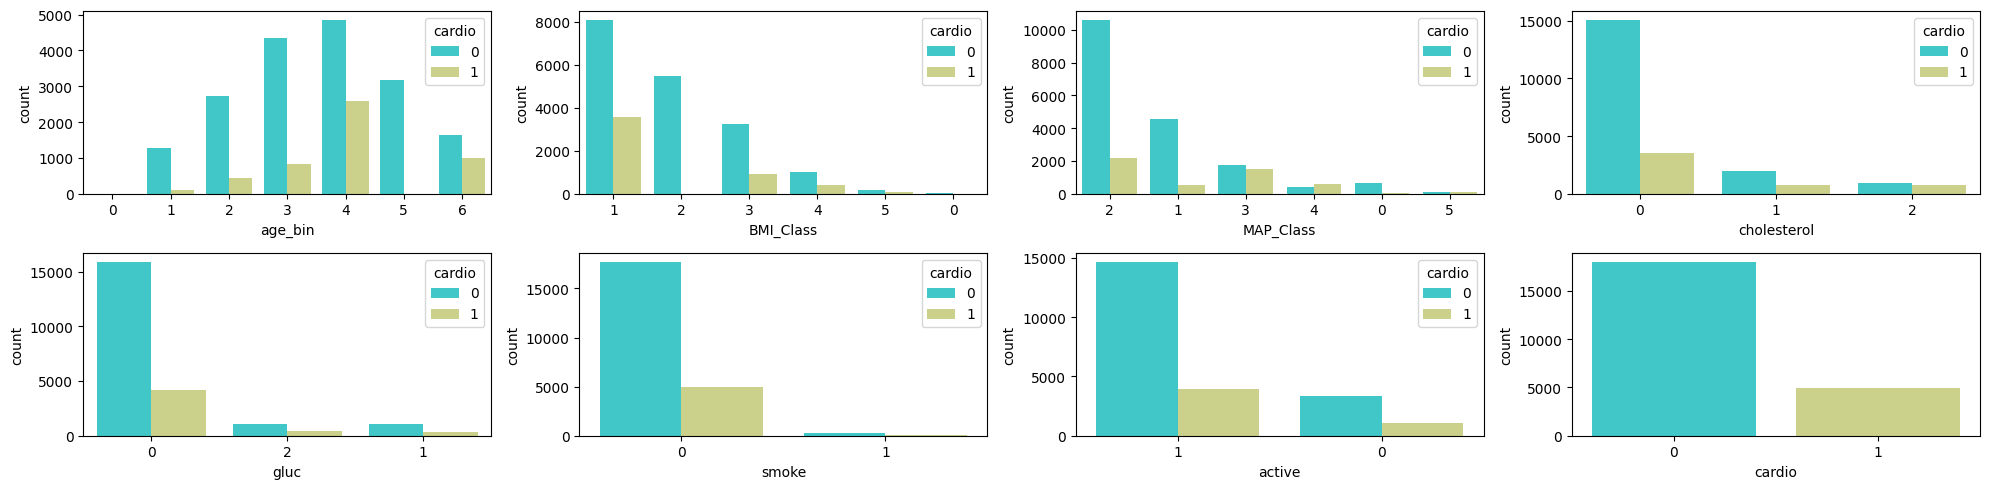

In [52]:
# for df_male_c2
f, axs = plt.subplots(2,4,figsize = (20,5))
sns.countplot(x=df_male_c2['age_bin'],hue=df_male_c2['cardio'],ax=axs[0,0],palette='rainbow')
sns.countplot(x=df_male_c2['BMI_Class'],order=df_male_c2['BMI_Class'].value_counts().index,hue=df_male_c2['cardio'],ax=axs[0,1],palette='rainbow')
sns.countplot(x=df_male_c2['MAP_Class'],order=df_male_c2['MAP_Class'].value_counts().index,hue=df_male_c2['cardio'],ax=axs[0,2],palette='rainbow')
sns.countplot(x=df_male_c2['cholesterol'],order=df_male_c2['cholesterol'].value_counts().index,hue=df_male_c2['cardio'],ax=axs[0,3],palette='rainbow')
sns.countplot(x=df_male_c2['gluc'],order=df_male_c2['gluc'].value_counts().index,hue=df_male_c2['cardio'],ax=axs[1,0],palette='rainbow')
sns.countplot(x=df_male_c2['smoke'],order=df_male_c2['smoke'].value_counts().index,hue=df_male_c2['cardio'],ax=axs[1,1],palette='rainbow')
sns.countplot(x=df_male_c2['active'],order=df_male_c2['active'].value_counts().index,hue=df_male_c2['cardio'],ax=axs[1,2],palette='rainbow')
sns.countplot(x=df_male_c2['cardio'],order=df_male_c2['cardio'].value_counts().index,ax=axs[1,3],palette='rainbow')

plt.tight_layout()
plt.show()

<ipython-input-53-03a5e26908ab>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_male_c3['cardio'],order=df_male_c3['cardio'].value_counts().index,ax=axs[1,3],palette='rainbow')


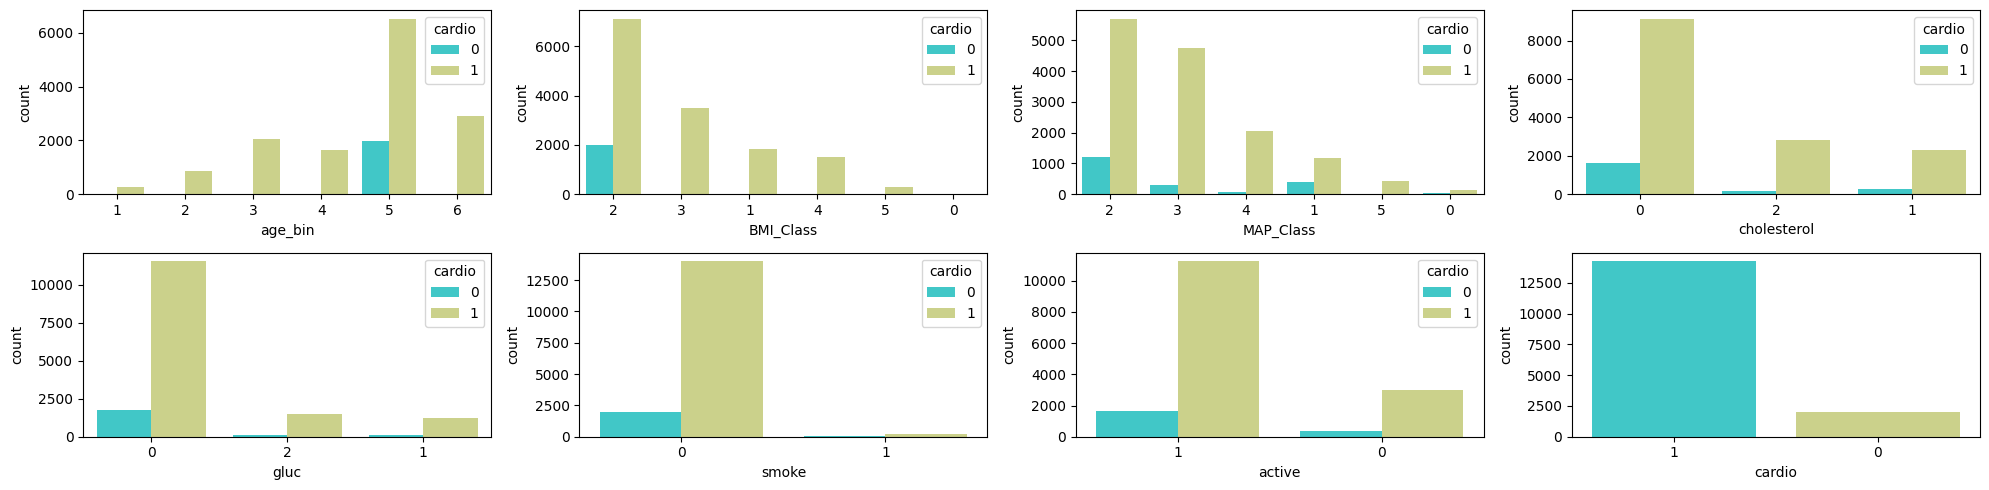

In [53]:
# for df_male_c3
f, axs = plt.subplots(2,4,figsize = (20,5))
sns.countplot(x=df_male_c3['age_bin'],hue=df_male_c3['cardio'],ax=axs[0,0],palette='rainbow')
sns.countplot(x=df_male_c3['BMI_Class'],order=df_male_c3['BMI_Class'].value_counts().index,hue=df_male_c3['cardio'],ax=axs[0,1],palette='rainbow')
sns.countplot(x=df_male_c3['MAP_Class'],order=df_male_c3['MAP_Class'].value_counts().index,hue=df_male_c3['cardio'],ax=axs[0,2],palette='rainbow')
sns.countplot(x=df_male_c3['cholesterol'],order=df_male_c3['cholesterol'].value_counts().index,hue=df_male_c3['cardio'],ax=axs[0,3],palette='rainbow')
sns.countplot(x=df_male_c3['gluc'],order=df_male_c3['gluc'].value_counts().index,hue=df_male_c3['cardio'],ax=axs[1,0],palette='rainbow')
sns.countplot(x=df_male_c3['smoke'],order=df_male_c3['smoke'].value_counts().index,hue=df_male_c3['cardio'],ax=axs[1,1],palette='rainbow')
sns.countplot(x=df_male_c3['active'],order=df_male_c3['active'].value_counts().index,hue=df_male_c3['cardio'],ax=axs[1,2],palette='rainbow')
sns.countplot(x=df_male_c3['cardio'],order=df_male_c3['cardio'].value_counts().index,ax=axs[1,3],palette='rainbow')

plt.tight_layout()
plt.show()

In [54]:
#list of columns
my_list = df_clusters.columns.values.tolist()
my_list

['Cluster',
 'gender',
 'age_bin',
 'BMI_Class',
 'MAP_Class',
 'cholesterol',
 'gluc',
 'smoke',
 'active',
 'cardio']

In [55]:
# function to calc % in column
def function(dataframe,valor):
    my_list = dataframe.columns.values.tolist()
    for x in my_list[2:]:
        for y in range(valor):
            percentages = round(((dataframe[x]== y) & (dataframe['cardio']== 1)).sum()/ (dataframe[x]== y).sum()* 100, 2)
            print(percentages)

In [56]:
# applying the function
# there must be a better way to do that though...
function(df_male_c3,8)

nan
100.0
100.0
100.0
100.0
76.59
100.0
nan
100.0
100.0
78.11
100.0
100.0
100.0
nan
nan
70.29
75.49
82.55
94.35
97.17
97.95
nan
nan
85.04
90.33
95.2
nan
nan
nan
nan
nan
86.95
90.59
91.51
nan
nan
nan
nan
nan
87.7
88.43
nan
nan
nan
nan
nan
nan
88.99
87.38
nan
nan
nan
nan
nan
nan
0.0
100.0
nan
nan
nan
nan
nan
nan


<ipython-input-55-099bc138f1fd>:6: RuntimeWarning: invalid value encountered in scalar divide
  percentages = round(((dataframe[x]== y) & (dataframe['cardio']== 1)).sum()/ (dataframe[x]== y).sum()* 100, 2)


In [57]:
# dictionary with list object in values
# placed by hand...
details = {
    'age_bin_0':[0.0, 0.0, 0.0, 0.0],
    'age_bin_1':[7.62, 92.44, 8.48, 100.0],
    'age_bin_2':[12.94, 92.46, 13.73, 100.0],
    'age_bin_3':[19.73, 92.21, 16.17, 100.0],
    'age_bin_4':[36.29, 100.0, 34.82, 100.0],
    'age_bin_5':[16.6, 84.63, 0.0, 76.59],
    'age_bin_6':[38.56, 93.29, 38.23, 100.0],

    'BMI_Class_0':[12.07, 100.0, 9.76, 100.0],
    'BMI_Class_1':[31.1, 100.0, 30.77, 100.0],
    'BMI_Class_2':[8.8, 86.34, 0.0, 78.11],
    'BMI_Class_3':[32.73, 94.86, 22.18, 100.0],
    'BMI_Class_4':[37.62, 94.29, 27.91, 100.0],
    'BMI_Class_5':[66.67, 100.0, 31.54, 100.0],

    'MAP_Class_0':[12.55, 85.71, 10.2, 70.29],
    'MAP_Class_1':[11.94, 75.34, 10.1, 75.49],
    'MAP_Class_2':[25.28, 100.0, 17.03, 82.55],
    'MAP_Class_3':[19.89, 85.49, 46.41, 94.35],
    'MAP_Class_4':[60.13, 97.42, 59.48, 97.17],
    'MAP_Class_5':[61.4, 95.04, 58.67, 97.95],

    'cholesterol_0':[22.06, 89.16, 18.84, 85.04],
    'cholesterol_1':[29.81, 92.4, 26.92, 90.33],
    'cholesterol_2':[48.41, 92.0, 44.38, 95.2],

    'gluc_0' : [23.69, 90.18, 20.78, 86.95],
    'gluc_1' : [28.45, 90.39, 24.72, 90.59],
    'gluc_2' : [31.87, 89.4, 31.12, 91.51],

    'smoke_0' : [25.93, 90.48, 21.73, 87.7],
    'smoke_1' : [18.9, 88.86, 19.49, 88.43],

    'active_0' : [29.93, 91.7, 24.19, 88.99],
    'active_1' : [23.16, 89.73, 21.1, 87.38],
}

In [58]:
# creating a Dataframe object from dictionary
# with custom indexing
df_pc = pd.DataFrame(details, index = ['Cluster 0','Cluster 1','Cluster 2','Cluster 3'])
df_pc.head()

,age_bin_0,age_bin_1,age_bin_2,age_bin_3,age_bin_4,age_bin_5,age_bin_6,BMI_Class_0,BMI_Class_1,BMI_Class_2,...,cholesterol_0,cholesterol_1,cholesterol_2,gluc_0,gluc_1,gluc_2,smoke_0,smoke_1,active_0,active_1
Cluster 0,0.0,7.62,12.94,19.73,36.29,16.60,38.56,12.07,31.10,8.80,...,22.06,29.81,48.41,23.69,28.45,31.87,25.93,18.90,29.93,23.16
Cluster 1,0.0,92.44,92.46,92.21,100.00,84.63,93.29,100.00,100.00,86.34,...,89.16,92.40,92.00,90.18,90.39,89.40,90.48,88.86,91.70,89.73
Cluster 2,0.0,8.48,13.73,16.17,34.82,0.00,38.23,9.76,30.77,0.00,...,18.84,26.92,44.38,20.78,24.72,31.12,21.73,19.49,24.19,21.10
Cluster 3,0.0,100.00,100.00,100.00,100.00,76.59,100.00,100.00,100.00,78.11,...,85.04,90.33,95.20,86.95,90.59,91.51,87.70,88.43,88.99,87.38


In [59]:
# creating separate dfs
df_agebins = df_pc.loc[:,"age_bin_0":"age_bin_6"]
df_bmi = df_pc.loc[:,"BMI_Class_0":"BMI_Class_5"]
df_map = df_pc.loc[:,"MAP_Class_0":"MAP_Class_5"]
df_chol = df_pc.loc[:,"cholesterol_0":"cholesterol_2"]
df_gluc = df_pc.loc[:,"gluc_0":"gluc_2"]
df_smokers = df_pc.loc[:,"smoke_0":"smoke_1"]
df_actives = df_pc.loc[:,"active_0":"active_1"]

In [60]:
df_agebins.head()

,age_bin_0,age_bin_1,age_bin_2,age_bin_3,age_bin_4,age_bin_5,age_bin_6
Cluster 0,0.0,7.62,12.94,19.73,36.29,16.60,38.56
Cluster 1,0.0,92.44,92.46,92.21,100.00,84.63,93.29
Cluster 2,0.0,8.48,13.73,16.17,34.82,0.00,38.23
Cluster 3,0.0,100.00,100.00,100.00,100.00,76.59,100.00


In [61]:
#Plotting Clusters
#AGE BINS
df_agebins.head()

,age_bin_0,age_bin_1,age_bin_2,age_bin_3,age_bin_4,age_bin_5,age_bin_6
Cluster 0,0.0,7.62,12.94,19.73,36.29,16.60,38.56
Cluster 1,0.0,92.44,92.46,92.21,100.00,84.63,93.29
Cluster 2,0.0,8.48,13.73,16.17,34.82,0.00,38.23
Cluster 3,0.0,100.00,100.00,100.00,100.00,76.59,100.00


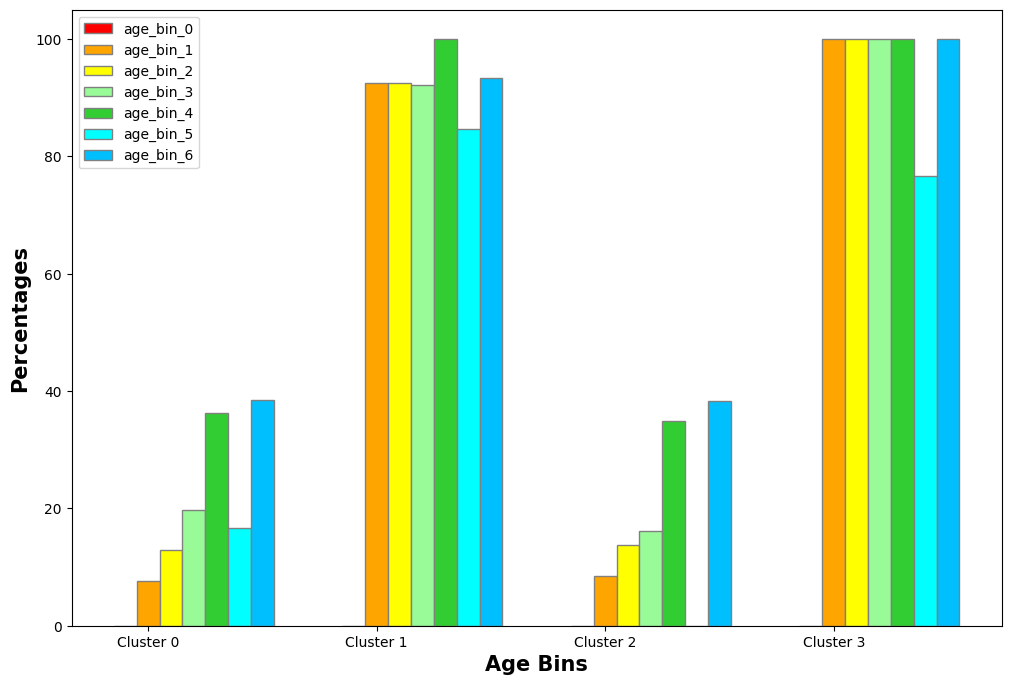

In [62]:
# set width of bar
barWidth = 0.10
fig = plt.subplots(figsize =(12, 8))

# set height of bar
age_bin_0 = df_agebins['age_bin_0']
age_bin_1 = df_agebins['age_bin_1']
age_bin_2 = df_agebins['age_bin_2']
age_bin_3 = df_agebins['age_bin_3']
age_bin_4 = df_agebins['age_bin_4']
age_bin_5 = df_agebins['age_bin_5']
age_bin_6 = df_agebins['age_bin_6']

# Set position of bar on X axis
br1 = np.arange(len(age_bin_0))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]


 # Make the plot
plt.bar(br1, age_bin_0, color ='red', width = barWidth,edgecolor ='grey', label ='age_bin_0')
plt.bar(br2, age_bin_1, color ='orange', width = barWidth,edgecolor ='grey', label ='age_bin_1')
plt.bar(br3, age_bin_2, color ='yellow', width = barWidth,edgecolor ='grey', label ='age_bin_2')
plt.bar(br4, age_bin_3, color ='palegreen', width = barWidth,edgecolor ='grey', label ='age_bin_3')
plt.bar(br5, age_bin_4, color ='limegreen', width = barWidth,edgecolor ='grey', label ='age_bin_4')
plt.bar(br6, age_bin_5, color ='aqua', width = barWidth,edgecolor ='grey', label ='age_bin_5')
plt.bar(br7, age_bin_6, color ='deepskyblue', width = barWidth,edgecolor ='grey', label ='age_bin_6')


# Adding Xticks
plt.xlabel('Age Bins', fontweight ='bold', fontsize = 15)
plt.ylabel('Percentages', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(age_bin_0))],
        ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])

plt.legend()
plt.show()

In [63]:
#BMI
df_bmi.head()

,BMI_Class_0,BMI_Class_1,BMI_Class_2,BMI_Class_3,BMI_Class_4,BMI_Class_5
Cluster 0,12.07,31.10,8.80,32.73,37.62,66.67
Cluster 1,100.00,100.00,86.34,94.86,94.29,100.00
Cluster 2,9.76,30.77,0.00,22.18,27.91,31.54
Cluster 3,100.00,100.00,78.11,100.00,100.00,100.00


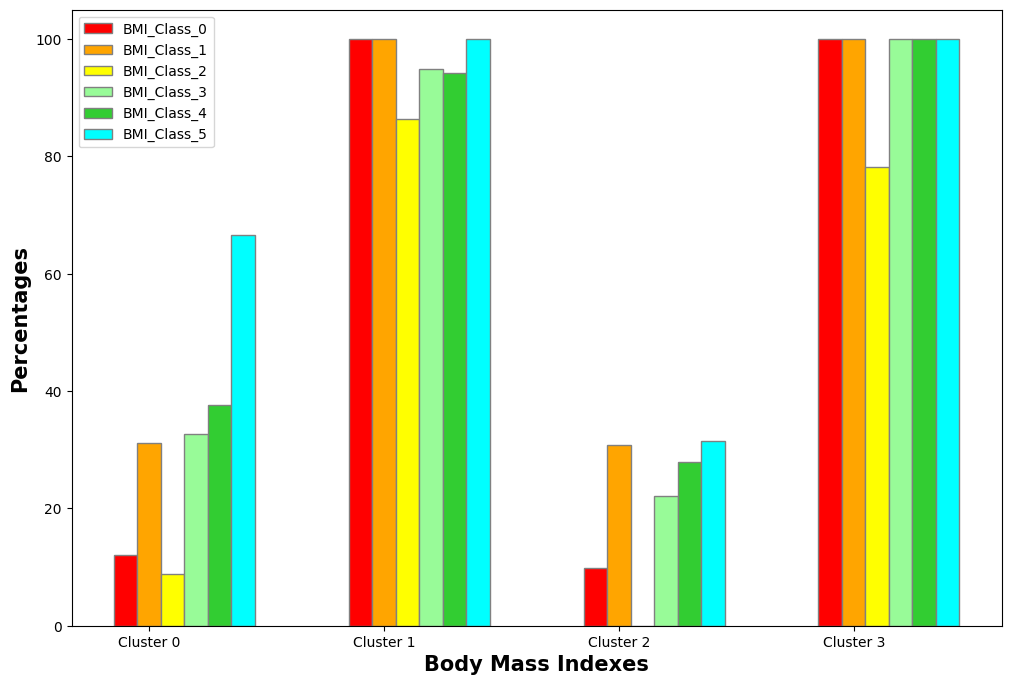

In [64]:
# set width of bar
barWidth = 0.10
fig = plt.subplots(figsize =(12, 8))

# set height of bar
BMI_Class_0 = df_bmi['BMI_Class_0']
BMI_Class_1 = df_bmi['BMI_Class_1']
BMI_Class_2 = df_bmi['BMI_Class_2']
BMI_Class_3 = df_bmi['BMI_Class_3']
BMI_Class_4 = df_bmi['BMI_Class_4']
BMI_Class_5 = df_bmi['BMI_Class_5']

 # Set position of bar on X axis
br1 = np.arange(len(BMI_Class_0))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]


# Make the plot
plt.bar(br1, BMI_Class_0, color ='red', width = barWidth,edgecolor ='grey', label ='BMI_Class_0')
plt.bar(br2, BMI_Class_1, color ='orange', width = barWidth,edgecolor ='grey', label ='BMI_Class_1')
plt.bar(br3, BMI_Class_2, color ='yellow', width = barWidth,edgecolor ='grey', label ='BMI_Class_2')
plt.bar(br4, BMI_Class_3, color ='palegreen', width = barWidth,edgecolor ='grey', label ='BMI_Class_3')
plt.bar(br5, BMI_Class_4, color ='limegreen', width = barWidth,edgecolor ='grey', label ='BMI_Class_4')
plt.bar(br6, BMI_Class_5, color ='aqua', width = barWidth,edgecolor ='grey', label ='BMI_Class_5')

 # Adding Xticks
plt.xlabel('Body Mass Indexes', fontweight ='bold', fontsize = 15)
plt.ylabel('Percentages', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(BMI_Class_0))],
        ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])

plt.legend()
plt.show()

In [65]:
#Mean Arterial Pressure(MAP)
df_map.head()

,MAP_Class_0,MAP_Class_1,MAP_Class_2,MAP_Class_3,MAP_Class_4,MAP_Class_5
Cluster 0,12.55,11.94,25.28,19.89,60.13,61.40
Cluster 1,85.71,75.34,100.00,85.49,97.42,95.04
Cluster 2,10.20,10.10,17.03,46.41,59.48,58.67
Cluster 3,70.29,75.49,82.55,94.35,97.17,97.95


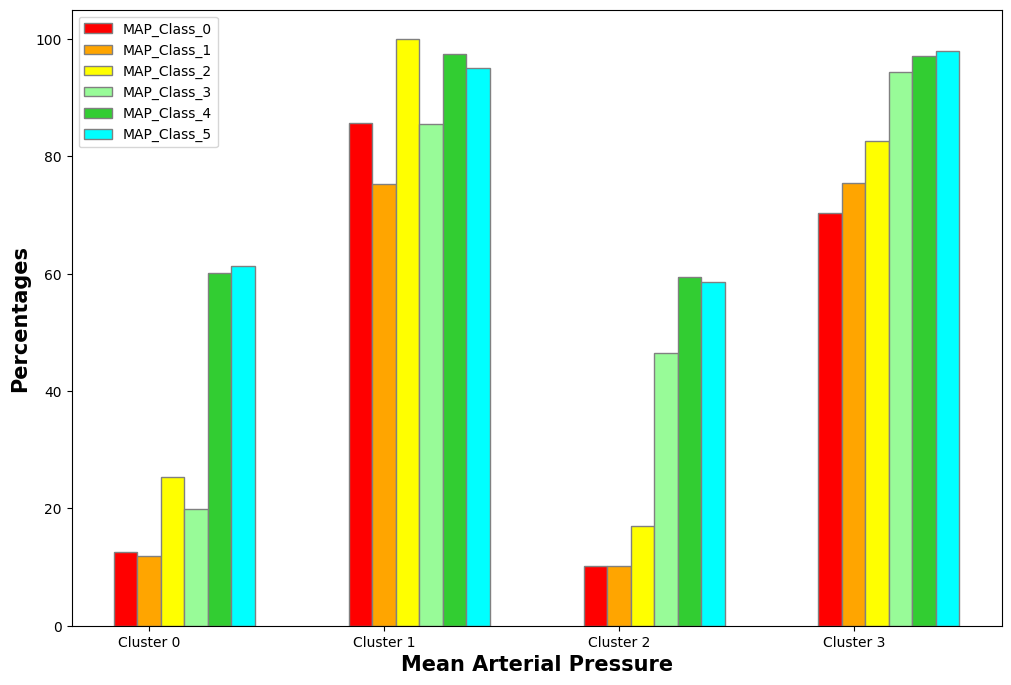

In [66]:
# set width of bar
barWidth = 0.10
fig = plt.subplots(figsize =(12, 8))

# set height of bar
MAP_Class_0 = df_map['MAP_Class_0']
MAP_Class_1 = df_map['MAP_Class_1']
MAP_Class_2 = df_map['MAP_Class_2']
MAP_Class_3 = df_map['MAP_Class_3']
MAP_Class_4 = df_map['MAP_Class_4']
MAP_Class_5 = df_map['MAP_Class_5']

 # Set position of bar on X axis
br1 = np.arange(len(MAP_Class_0))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]


# Make the plot
plt.bar(br1, MAP_Class_0, color ='red', width = barWidth,edgecolor ='grey', label ='MAP_Class_0')
plt.bar(br2, MAP_Class_1, color ='orange', width = barWidth,edgecolor ='grey', label ='MAP_Class_1')
plt.bar(br3, MAP_Class_2, color ='yellow', width = barWidth,edgecolor ='grey', label ='MAP_Class_2')
plt.bar(br4, MAP_Class_3, color ='palegreen', width = barWidth,edgecolor ='grey', label ='MAP_Class_3')
plt.bar(br5, MAP_Class_4, color ='limegreen', width = barWidth,edgecolor ='grey', label ='MAP_Class_4')
plt.bar(br6, MAP_Class_5, color ='aqua', width = barWidth,edgecolor ='grey', label ='MAP_Class_5')

 # Adding Xticks
plt.xlabel('Mean Arterial Pressure', fontweight ='bold', fontsize = 15)
plt.ylabel('Percentages', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(MAP_Class_0))],
        ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])

plt.legend()
plt.show()

In [67]:
#Cholesterol
df_chol.head()

,cholesterol_0,cholesterol_1,cholesterol_2
Cluster 0,22.06,29.81,48.41
Cluster 1,89.16,92.40,92.00
Cluster 2,18.84,26.92,44.38
Cluster 3,85.04,90.33,95.20


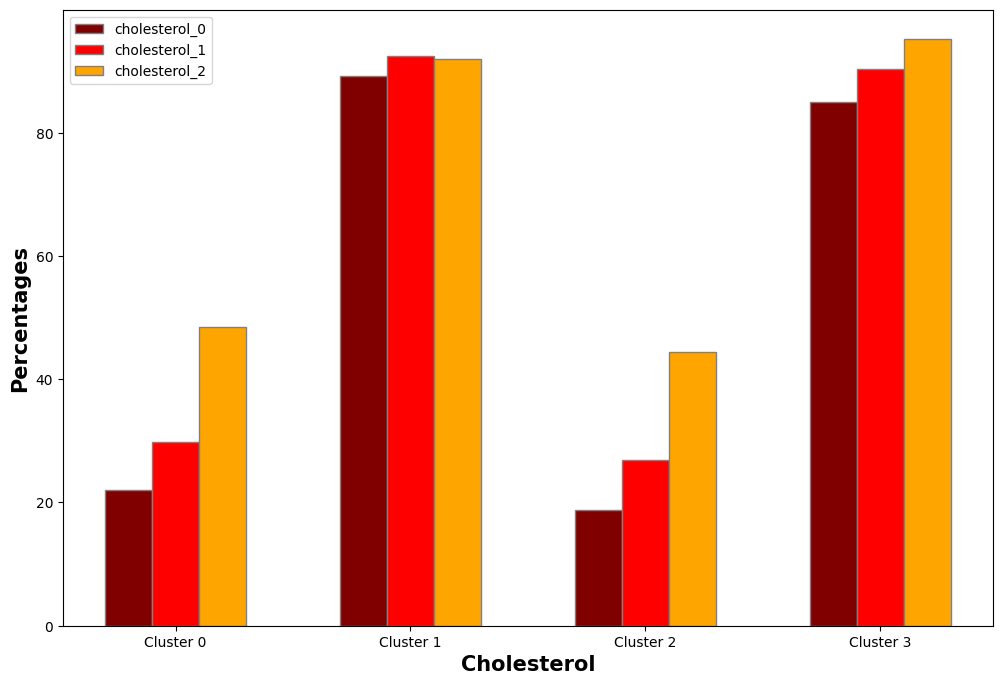

In [68]:
# set width of bar
barWidth = 0.20
fig = plt.subplots(figsize =(12, 8))

# set height of bar
cholesterol_0 = df_chol['cholesterol_0']
cholesterol_1 = df_chol['cholesterol_1']
cholesterol_2 = df_chol['cholesterol_2']

# Set position of bar on X axis
br1 = np.arange(len(cholesterol_0))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, cholesterol_0, color ='maroon', width = barWidth,edgecolor ='grey', label ='cholesterol_0')
plt.bar(br2, cholesterol_1, color ='r', width = barWidth,edgecolor ='grey', label ='cholesterol_1')
plt.bar(br3, cholesterol_2, color ='orange', width = barWidth,edgecolor ='grey', label ='cholesterol_2')

# Adding Xticks
plt.xlabel('Cholesterol', fontweight ='bold', fontsize = 15)
plt.ylabel('Percentages', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(cholesterol_0))],
        ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])

plt.legend()
plt.show()

In [69]:
#Glucose
df_gluc.head()

,gluc_0,gluc_1,gluc_2
Cluster 0,23.69,28.45,31.87
Cluster 1,90.18,90.39,89.40
Cluster 2,20.78,24.72,31.12
Cluster 3,86.95,90.59,91.51


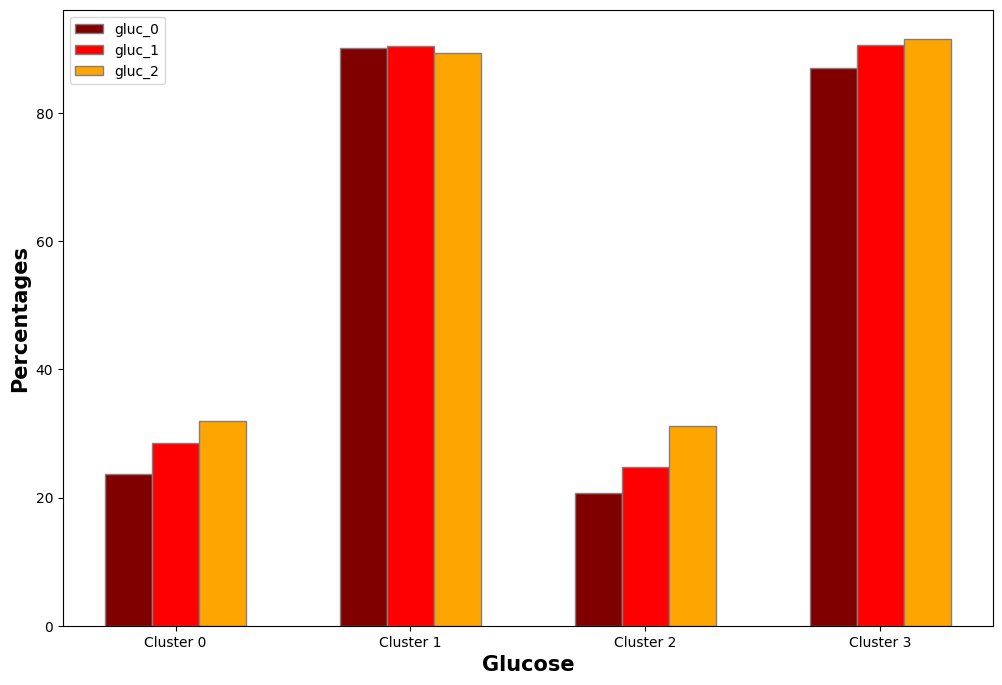

In [70]:
# set width of bar
barWidth = 0.20
fig = plt.subplots(figsize =(12, 8))

# set height of bar
gluc_0 = df_gluc['gluc_0']
gluc_1 = df_gluc['gluc_1']
gluc_2 = df_gluc['gluc_2']

# Set position of bar on X axis
br1 = np.arange(len(gluc_0))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, gluc_0, color ='maroon', width = barWidth,edgecolor ='grey', label ='gluc_0')
plt.bar(br2, gluc_1, color ='r', width = barWidth,edgecolor ='grey', label ='gluc_1')
plt.bar(br3, gluc_2, color ='orange', width = barWidth,edgecolor ='grey', label ='gluc_2')

# Adding Xticks
plt.xlabel('Glucose', fontweight ='bold', fontsize = 15)
plt.ylabel('Percentages', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(gluc_0))],
        ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])

plt.legend()
plt.show()

In [71]:
#Smokers
df_smokers.head()

,smoke_0,smoke_1
Cluster 0,25.93,18.90
Cluster 1,90.48,88.86
Cluster 2,21.73,19.49
Cluster 3,87.70,88.43


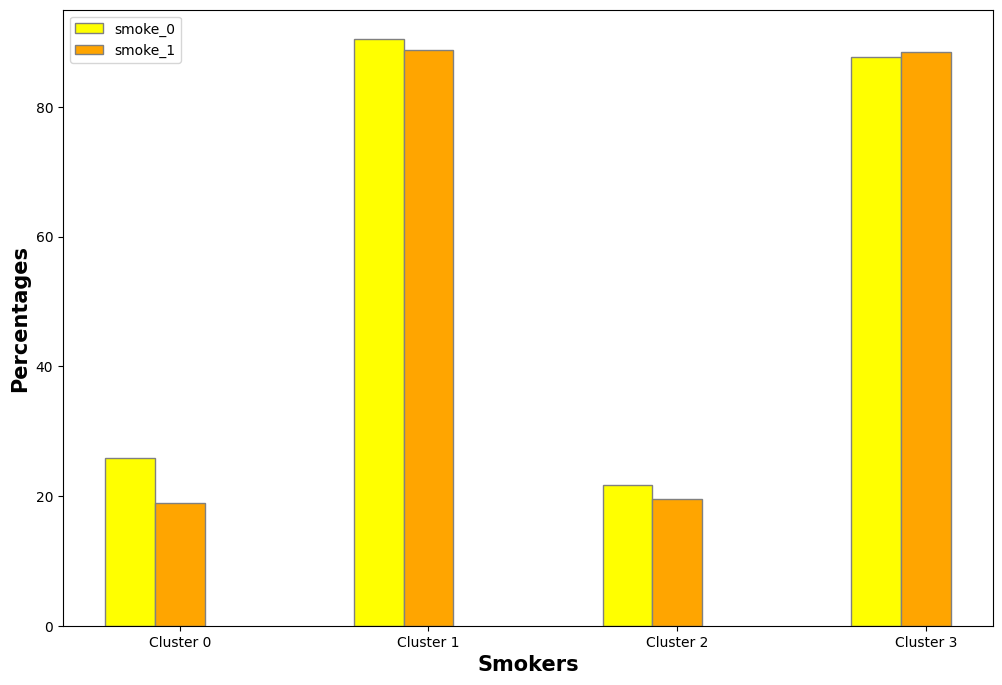

In [72]:
# set width of bar
barWidth = 0.20
fig = plt.subplots(figsize =(12, 8))

# set height of bar
smoke_0 = df_smokers['smoke_0']
smoke_1 = df_smokers['smoke_1']

 # Set position of bar on X axis
br1 = np.arange(len(gluc_0))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, smoke_0, color ='yellow', width = barWidth,edgecolor ='grey', label ='smoke_0')
plt.bar(br2, smoke_1, color ='orange', width = barWidth,edgecolor ='grey', label ='smoke_1')

# Adding Xticks
plt.xlabel('Smokers', fontweight ='bold', fontsize = 15)
plt.ylabel('Percentages', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(smoke_0))],
        ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])

plt.legend()
plt.show()

In [73]:
#Actives
df_actives.head()

,active_0,active_1
Cluster 0,29.93,23.16
Cluster 1,91.70,89.73
Cluster 2,24.19,21.10
Cluster 3,88.99,87.38


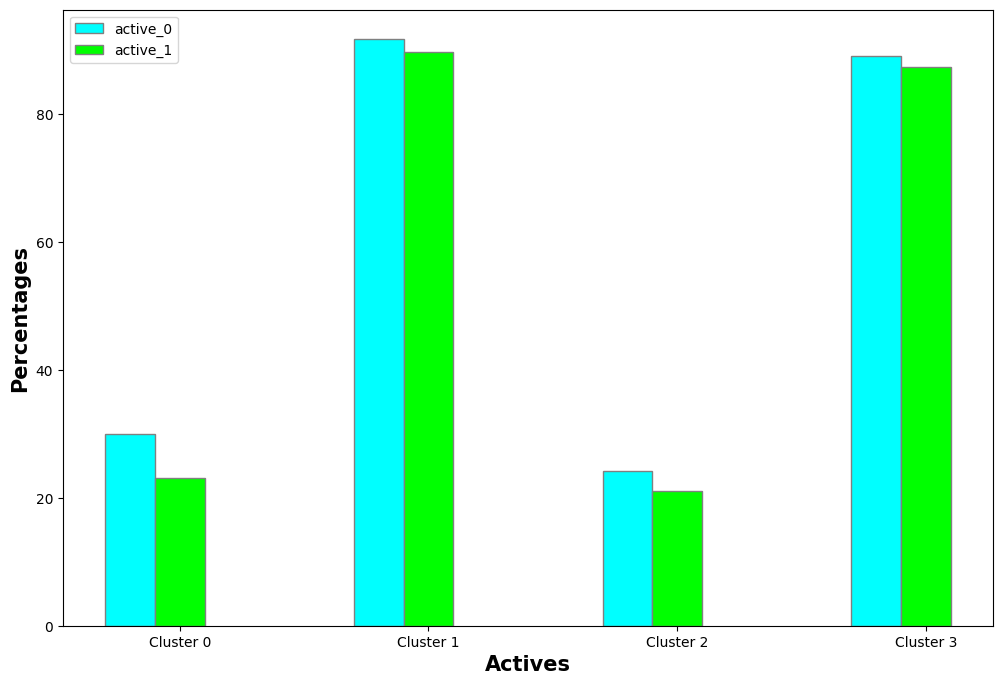

In [74]:
# set width of bar
barWidth = 0.20
fig = plt.subplots(figsize =(12, 8))

# set height of bar
active_0 = df_actives['active_0']
active_1 = df_actives['active_1']

 # Set position of bar on X axis
br1 = np.arange(len(gluc_0))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, active_0, color ='cyan', width = barWidth,edgecolor ='grey', label ='active_0')
plt.bar(br2, active_1, color ='lime', width = barWidth,edgecolor ='grey', label ='active_1')

# Adding Xticks
plt.xlabel('Actives', fontweight ='bold', fontsize = 15)
plt.ylabel('Percentages', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(active_0))],
        ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])

plt.legend()
plt.show()

# Preprocessing

In [75]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 118.2 MB/s eta 0:00:00


In [76]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import sweetviz as sv
from sklearn.naive_bayes import GaussianNB

In [77]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_ml = df_clusters.apply(le.fit_transform)
df_ml.describe()

,Cluster,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
count,60142.000000,60142.000000,60142.000000,60142.00000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000
mean,1.748296,0.347311,4.042233,1.95213,2.237638,0.350953,0.220229,0.085631,0.803648,0.488228
std,1.037753,0.476120,1.377070,0.92357,0.938629,0.670076,0.567607,0.279820,0.397241,0.499866
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,3.000000,1.00000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2.000000,0.000000,4.000000,2.00000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,1.000000,5.000000,2.00000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,3.000000,1.000000,6.000000,5.00000,5.000000,2.000000,2.000000,1.000000,1.000000,1.000000


In [78]:
target_name = 'cardio'
data_target = df_clusters[target_name]
data = df_clusters.drop([target_name], axis=1)

In [79]:
#separate into 30/70%
train, test, target, target_test = train_test_split(data, data_target, test_size=0.3, random_state=0)

In [80]:
#%% split training set to validation set
Xtrain, Xval, Ztrain, Zval = train_test_split(train, target, test_size=0.3, random_state=0)

# Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [82]:
# Random Forest

random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [100, 300]}, cv=5).fit(train, target)
random_forest.fit(train, target)
acc_random_forest = round(random_forest.score(train, target) * 100, 2)
print(acc_random_forest,random_forest.best_params_)

88.44 {'n_estimators': 300}


In [83]:
acc_test_random_forest = round(random_forest.score(test, target_test) * 100, 2)
acc_test_random_forest

87.81

In [84]:
diff_random_forest = acc_random_forest - acc_test_random_forest
diff_random_forest

0.6299999999999955

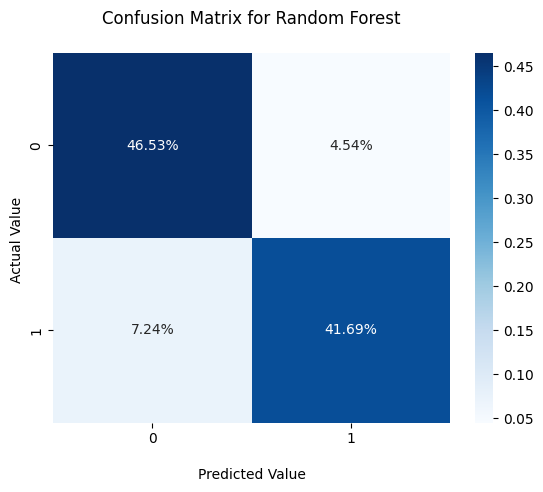

In [85]:
y_pred_df = random_forest.predict(Xval)

#Get the confusion matrix
cf_matrix = confusion_matrix(Zval, y_pred_df)

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Random Forest\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [86]:
print(classification_report(Zval, y_pred_df))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      6450
           1       0.90      0.85      0.88      6180

    accuracy                           0.88     12630
   macro avg       0.88      0.88      0.88     12630
weighted avg       0.88      0.88      0.88     12630



In [87]:
import joblib

# Save the trained model to a file
model_filename = 'random_forest_model.joblib'
joblib.dump(random_forest, model_filename)
print(f"Model saved as {model_filename}")

Model saved as random_forest_model.joblib
